In [38]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import time module
import time


In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
kapaa us
hermanus za
sao filipe cv
castro cl
jodiya in
hirara jp
kastamonu tr
ondorhaan mn
el alto pe
iracoubo gf
butaritari ki
souillac mu
araouane ml
busselton au
new norfolk au
georgetown sh
busselton au
yellowknife ca
cherskiy ru
new norfolk au
constitucion cl
atuona pf
albany au
tabas ir
san patricio mx
quatre cocos mu
skibbereen ie
klaksvik fo
vaitupu wf
qaanaaq gl
pevek ru
vila franca do campo pt
port alfred za
ancud cl
horodyshche ua
bethel us
tasiilaq gl
hilo us
portland au
esperance au
riyadh sa
belmonte br
fort nelson ca
nampula mz
matara lk
port alfred za
qaanaaq gl
la orilla mx
busselton au
husavik is
hilo us
rikitea pf
ushuaia ar
kommunisticheskiy ru
bambous virieux mu
puerto ayora ec
faanui pf
kruisfontein za
cabo san lucas mx
busselton au
kedrovyy ru
mar del plata ar
hithadhoo mv
upernavik gl
hilo us
mar del plata ar
barentsburg sj
jamestown sh
vaini to
hay river ca
makakilo city us
esperance au
spresiano it
albany au
rikitea pf
bluff nz
punta arenas cl
taola

salalah om
puerto narino co
dunedin nz
sapele ng
bluff nz
ushuaia ar
taklisah tn
victoria sc
tuatapere nz
barrow us
simbahan ph
yellowknife ca
mataura pf
tazovskiy ru
tena ec
buqayq sa
henties bay na
busselton au
gisborne nz
busselton au
hithadhoo mv
atuona pf
labuhan id
rikitea pf
salalah om
gamba ga
whitehorse ca
ushuaia ar
rikitea pf
wewak pg
dovers vc
chuy uy
san carlos de bariloche ar
belushya guba ru
bluff nz
trzebiatow pl
date jp
srivardhan in
hamilton bm
ancud cl
timmins ca
ushuaia ar
busselton au
camacha pt
south lake tahoe us
lubango ao
geraldton au
kruisfontein za
rikitea pf
boende cd
sur om
longyearbyen sj
mataura pf
ushuaia ar
ushuaia ar
areka et
kahului us
vila velha br
haines junction ca
puerto cabezas ni
ushuaia ar
ouadda cf
busselton au
kamenskoye ru
ushuaia ar
mataura pf
torbay ca
boffa gn
ossora ru
robertsport lr
ngorongoro tz
mataura pf
busselton au
majene id
kolokani ml
mnogovershinnyy ru
karaul ru
ushuaia ar
rikitea pf
ossora ru
coquimbo cl
vanavara ru
ribeira gra

hermanus za
talnakh ru
wladyslawowo pl
broadview heights us
leningradskiy ru
hithadhoo mv
illoqqortoormiut gl
bay roberts ca
azimur ma
bluff nz
marawi sd
meulaboh id
sisimiut gl
mount isa au
mataura pf
ushuaia ar
vardo no
naze jp
cape town za
albany au
chokurdakh ru
vila franca do campo pt
klaksvik fo
oranjestad aw
tabukiniberu ki
taltal cl
pevek ru
qaanaaq gl
nome us
cap malheureux mu
ganzhou cn
tumannyy ru
ribeira brava cv
mataura pf
ushuaia ar
esperance au
vaini to
iqaluit ca
busselton au
shubarkuduk kz
palmer us
georgetown sh
qaanaaq gl
dikson ru
peniche pt
hasaki jp
la ronge ca
umzimvubu za
cehegin es
punta arenas cl
jamestown sh
mataram id
kikwit cd
rikitea pf
nadym ru
praia da vitoria pt
rikitea pf
hermanus za
bonavista ca
charlottetown ca
port alfred za
lasa cn
east london za
eureka us
hilo us
jamestown sh
albany au
mataura pf
wesselsbron za
cranbrook ca
rikitea pf
punta arenas cl
ribeira brava cv
mataura pf
paraiso mx
port hardy ca
padang id
punta arenas cl
kapaa us
samana do


In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=179763f7ee98e585b7dbc99d2ce49832


In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [28]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 34 | rikitea
Processing Record 2 of Set 34 | kapaa
Processing Record 3 of Set 34 | hermanus
Processing Record 4 of Set 34 | sao filipe
Processing Record 5 of Set 34 | castro
Processing Record 6 of Set 34 | jodiya
Processing Record 7 of Set 34 | hirara
Processing Record 8 of Set 34 | kastamonu
Processing Record 9 of Set 34 | ondorhaan
City not found. Skipping...
Processing Record 10 of Set 34 | el alto
Processing Record 11 of Set 34 | iracoubo
Processing Record 12 of Set 34 | butaritari
Processing Record 13 of Set 34 | souillac
Processing Record 14 of Set 34 | araouane
Processing Record 15 of Set 34 | busselton
Processing Record 16 of Set 34 | new norfolk
Processing Record 17 of Set 34 | georgetown
Processing Record 18 of Set 34 | yellowknife
Processing Record 19 of Set 34 | cherskiy
Processing Record 20 of Set 34 | constitucion
Processing Record 21 of Set 34 | atuona
Processing Record 22 of Set 34 | albany
Processing Record 23 of Set 34 | tabas
Processing Rec

Processing Record 39 of Set 37 | wanning
Processing Record 40 of Set 37 | kendari
Processing Record 41 of Set 37 | emerald
Processing Record 42 of Set 37 | novo aripuana
Processing Record 43 of Set 37 | bakchar
Processing Record 44 of Set 37 | morgan city
Processing Record 45 of Set 37 | cidreira
Processing Record 46 of Set 37 | anadyr
Processing Record 47 of Set 37 | gat
Processing Record 48 of Set 37 | mattawa
Processing Record 49 of Set 37 | nhulunbuy
Processing Record 50 of Set 37 | khatanga
Processing Record 1 of Set 38 | maloyaz
City not found. Skipping...
Processing Record 2 of Set 38 | sept-iles
Processing Record 3 of Set 38 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 38 | folkestone
Processing Record 5 of Set 38 | coffs harbour
Processing Record 6 of Set 38 | alexandria
Processing Record 7 of Set 38 | cayenne
Processing Record 8 of Set 38 | chokurdakh
Processing Record 9 of Set 38 | beringovskiy
Processing Record 10 of Set 38 | volnoye
Processing Reco

Processing Record 22 of Set 41 | longyearbyen
Processing Record 23 of Set 41 | areka
Processing Record 24 of Set 41 | haines junction
Processing Record 25 of Set 41 | puerto cabezas
Processing Record 26 of Set 41 | ouadda
Processing Record 27 of Set 41 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 41 | boffa
Processing Record 29 of Set 41 | ossora
Processing Record 30 of Set 41 | robertsport
Processing Record 31 of Set 41 | ngorongoro
Processing Record 32 of Set 41 | majene
Processing Record 33 of Set 41 | kolokani
Processing Record 34 of Set 41 | mnogovershinnyy
Processing Record 35 of Set 41 | karaul
City not found. Skipping...
Processing Record 36 of Set 41 | vanavara
Processing Record 37 of Set 41 | tura
Processing Record 38 of Set 41 | lindon
Processing Record 39 of Set 41 | hervey bay
Processing Record 40 of Set 41 | port hawkesbury
Processing Record 41 of Set 41 | bandarbeyla
Processing Record 42 of Set 41 | russell
Processing Record 43 of Set 41 | barra d

Processing Record 6 of Set 45 | lasa
Processing Record 7 of Set 45 | santa ana
Processing Record 8 of Set 45 | conceicao do araguaia
Processing Record 9 of Set 45 | mercedes
Processing Record 10 of Set 45 | baherden
Processing Record 11 of Set 45 | mareeba
Processing Record 12 of Set 45 | barra do bugres
Processing Record 13 of Set 45 | saint-augustin
Processing Record 14 of Set 45 | kupang
Processing Record 15 of Set 45 | virginia beach
Processing Record 16 of Set 45 | jalu
Processing Record 17 of Set 45 | lapua
Processing Record 18 of Set 45 | tromso
Processing Record 19 of Set 45 | wladyslawowo
Processing Record 20 of Set 45 | broadview heights
Processing Record 21 of Set 45 | bay roberts
Processing Record 22 of Set 45 | azimur
City not found. Skipping...
Processing Record 23 of Set 45 | marawi
Processing Record 24 of Set 45 | meulaboh
Processing Record 25 of Set 45 | sisimiut
Processing Record 26 of Set 45 | naze
Processing Record 27 of Set 45 | oranjestad
Processing Record 28 of S

In [32]:
len(city_data)

547

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.07,69,5,12.66,PF,2021-02-05 23:42:12
1,Kapaa,22.0752,-159.3190,73.00,60,75,3.44,US,2021-02-05 23:42:12
2,Hermanus,-34.4187,19.2345,66.99,88,4,1.01,ZA,2021-02-05 23:42:12
3,Sao Filipe,14.8961,-24.4956,69.42,77,25,12.19,CV,2021-02-05 23:42:12
4,Castro,-24.7911,-50.0119,61.00,58,0,1.74,BR,2021-02-05 23:42:12
5,Jodiya,22.6925,70.3060,63.54,48,0,11.01,IN,2021-02-05 23:42:12
6,Hirara,24.8000,125.2833,62.60,82,20,4.61,JP,2021-02-05 23:42:12
7,Kastamonu,41.5000,33.6667,36.88,84,52,1.86,TR,2021-02-05 23:42:13
8,El Alto,-4.2714,-81.2147,73.62,77,32,17.60,PE,2021-02-05 23:42:13
9,Iracoubo,5.4802,-53.2011,77.41,86,88,15.46,GF,2021-02-05 23:42:13


In [35]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-02-05 23:42:12,-23.1203,-134.9692,79.07,69,5,12.66
1,Kapaa,US,2021-02-05 23:42:12,22.0752,-159.3190,73.00,60,75,3.44
2,Hermanus,ZA,2021-02-05 23:42:12,-34.4187,19.2345,66.99,88,4,1.01
3,Sao Filipe,CV,2021-02-05 23:42:12,14.8961,-24.4956,69.42,77,25,12.19
4,Castro,BR,2021-02-05 23:42:12,-24.7911,-50.0119,61.00,58,0,1.74
5,Jodiya,IN,2021-02-05 23:42:12,22.6925,70.3060,63.54,48,0,11.01
6,Hirara,JP,2021-02-05 23:42:12,24.8000,125.2833,62.60,82,20,4.61
7,Kastamonu,TR,2021-02-05 23:42:13,41.5000,33.6667,36.88,84,52,1.86
8,El Alto,PE,2021-02-05 23:42:13,-4.2714,-81.2147,73.62,77,32,17.60
9,Iracoubo,GF,2021-02-05 23:42:13,5.4802,-53.2011,77.41,86,88,15.46


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

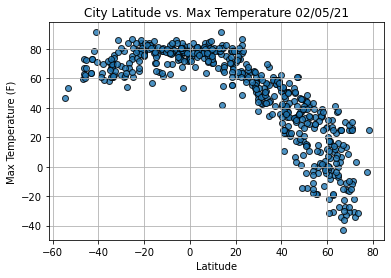

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

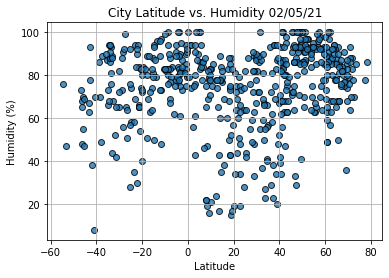

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

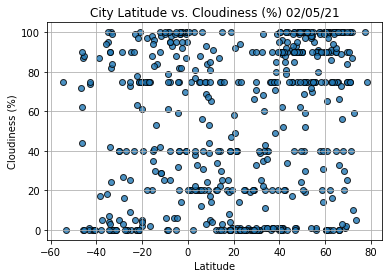

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

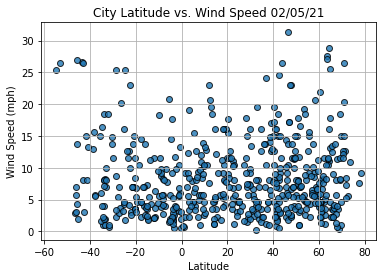

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-02-05 23:42:13
Lat                        -33.65
Lng                       115.333
Max Temp                       61
Humidity                       76
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
542    False
543     True
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2021-02-05 23:42:12,22.0752,-159.3190,73.00,60,75,3.44
3,Sao Filipe,CV,2021-02-05 23:42:12,14.8961,-24.4956,69.42,77,25,12.19
5,Jodiya,IN,2021-02-05 23:42:12,22.6925,70.3060,63.54,48,0,11.01
6,Hirara,JP,2021-02-05 23:42:12,24.8000,125.2833,62.60,82,20,4.61
7,Kastamonu,TR,2021-02-05 23:42:13,41.5000,33.6667,36.88,84,52,1.86


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]



In [50]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2021-02-05 23:42:12,22.0752,-159.3190,73.00,60,75,3.44
3,Sao Filipe,CV,2021-02-05 23:42:12,14.8961,-24.4956,69.42,77,25,12.19
5,Jodiya,IN,2021-02-05 23:42:12,22.6925,70.3060,63.54,48,0,11.01
6,Hirara,JP,2021-02-05 23:42:12,24.8000,125.2833,62.60,82,20,4.61
7,Kastamonu,TR,2021-02-05 23:42:13,41.5000,33.6667,36.88,84,52,1.86


In [51]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-02-05 23:42:12,-23.1203,-134.9692,79.07,69,5,12.66
2,Hermanus,ZA,2021-02-05 23:42:12,-34.4187,19.2345,66.99,88,4,1.01
4,Castro,BR,2021-02-05 23:42:12,-24.7911,-50.0119,61.00,58,0,1.74
8,El Alto,PE,2021-02-05 23:42:13,-4.2714,-81.2147,73.62,77,32,17.60
11,Souillac,MU,2021-02-05 23:42:13,-20.5167,57.5167,77.00,83,75,3.44


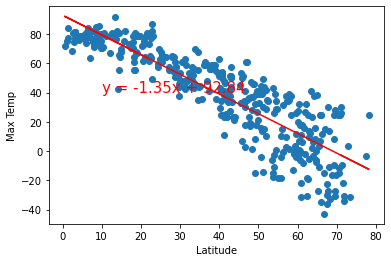

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

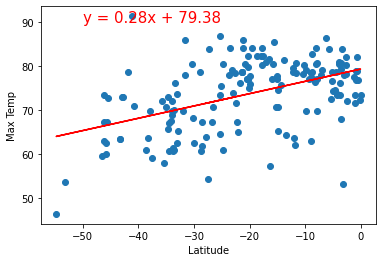

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

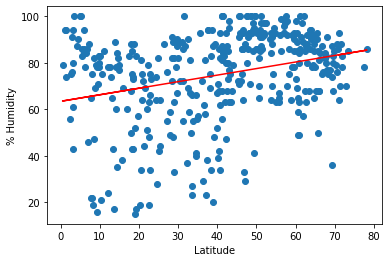

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

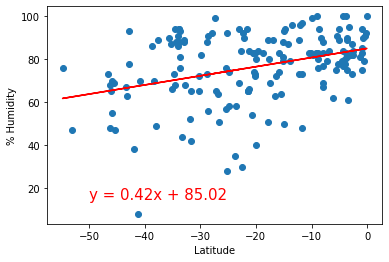

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

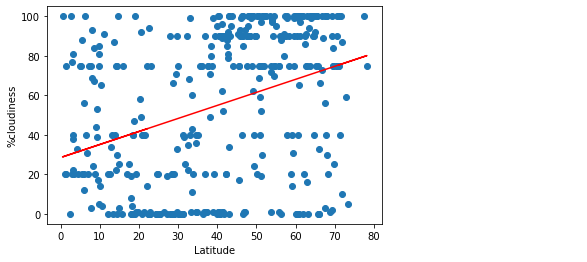

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %cloudiness', '%cloudiness',(100,80))

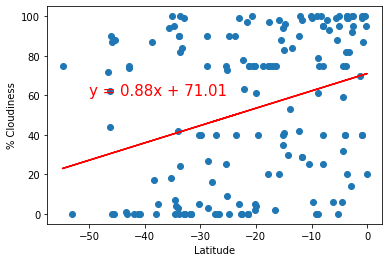

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

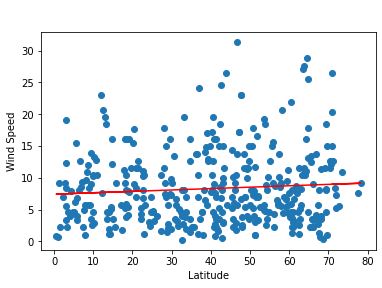

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

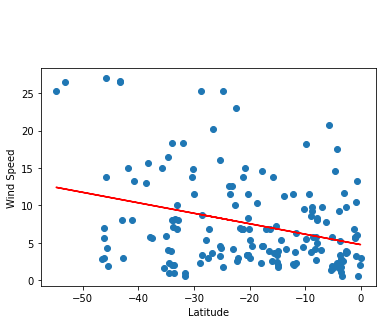

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))